In [1]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from matplotlib.pyplot import plot

calls_service = pd.read_csv('mfdems.csv')
liq_lic = pd.read_csv('liquorlicenses.csv')
nat_irs_16 = pd.read_csv('16zpallagi.csv')

In [2]:
mke_zip = [x for x in calls_service['ZIP Code'].unique().astype(int) if ~np.isnan(x)]
mke_ald = [x for x in calls_service['Aldermanic District'].unique().astype(int) if ~np.isnan(x)]
mke_irs_16 = nat_irs_16[nat_irs_16['zipcode'].isin(mke_zip)]

In [3]:
service_by_zip = calls_service[["ZIP Code","Original Call for Service Type"]].groupby(['ZIP Code'], as_index=True).agg(['count']).sort_values(by='ZIP Code', ascending=True)

In [4]:
df=calls_service
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df['Incident Date'] = df['Incident Date'].dt.strftime('%Y-%m')

In [5]:
any_service_call = df[['Aldermanic District','Final Call for Service Type']].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
any_service_call.columns = ['# of Service Calls']

In [6]:
cardiac = calls_service[calls_service['Final Call for Service Type']=='Cardiac or Respiratory Arrest/Death'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
cardiac.columns = ['Incidents of Cardiac or Respiratory Arrest/Death']

In [7]:
downgraded = calls_service[calls_service['Final Call for Service Type']=='Downgraded Response'].groupby(['Aldermanic District'], as_index=False).agg(['count'])['Final Call for Service Type']
downgraded.columns = ['Incidents of Downgraded Response']

In [8]:
liq_avail = liq_lic[['ALDERMANIC_DISTRICT','EXP_DATE']].groupby(['ALDERMANIC_DISTRICT'], as_index=True).agg(['count']).sort_values(by='ALDERMANIC_DISTRICT', ascending=True)
liq_avail = liq_avail['EXP_DATE']
liq_avail.columns=['# of Places with Liquor Licenses']
#liq_avail.head()

In [16]:
card_liq_down = cardiac.merge(liq_avail,left_index=True,right_index=True,how='left').merge(downgraded,left_index=True,right_index=True,how='left')
all_stuff = any_service_call.merge(card_liq_down,left_index=True,right_index=True,how='left')
all_stuff.sort_values(by='# of Service Calls', ascending=False).head()

,# of Service Calls,Incidents of Cardiac or Respiratory Arrest/Death,# of Places with Liquor Licenses,Incidents of Downgraded Response
Aldermanic District,,,,
15.0,12867,96,58,362
6.0,11953,82,99,206
4.0,11200,86,269,301
1.0,10595,68,35,194
7.0,10492,81,30,263


In [10]:
all_stuff.sort_values(by='Incidents of Cardiac or Respiratory Arrest/Death',ascending=False).head()

,# of Service Calls,Incidents of Cardiac or Respiratory Arrest/Death,# of Places with Liquor Licenses,Incidents of Downgraded Response
Aldermanic District,,,,
9.0,8024,106,32,106
13.0,4718,97,91,92
15.0,12867,96,58,362
4.0,11200,86,269,301
6.0,11953,82,99,206


In [11]:
all_stuff.sort_values(by='# of Places with Liquor Licenses',ascending=False).head()

,# of Service Calls,Incidents of Cardiac or Respiratory Arrest/Death,# of Places with Liquor Licenses,Incidents of Downgraded Response
Aldermanic District,,,,
4.0,11200,86,269,301
3.0,3941,56,188,119
12.0,7033,81,188,206
14.0,3644,54,124,79
6.0,11953,82,99,206


In [12]:
all_stuff.sort_values(by='Incidents of Downgraded Response',ascending=False).head()

,# of Service Calls,Incidents of Cardiac or Respiratory Arrest/Death,# of Places with Liquor Licenses,Incidents of Downgraded Response
Aldermanic District,,,,
15.0,12867,96,58,362
4.0,11200,86,269,301
7.0,10492,81,30,263
2.0,8807,77,22,248
6.0,11953,82,99,206


In [13]:
## Notice that District 4 is in the top five of all three lists!
## That's not a good thing

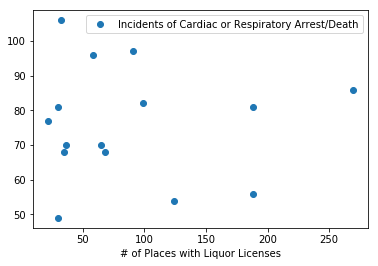

In [14]:
card_liq_down.plot(x='# of Places with Liquor Licenses',y='Incidents of Cardiac or Respiratory Arrest/Death', style='o')

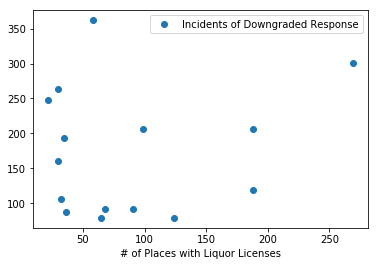

In [15]:
card_liq_down.plot(x='# of Places with Liquor Licenses',y='Incidents of Downgraded Response', style='o')